# 𝐌𝐍𝐈𝐒𝐓 𝐰𝐢𝐭𝐡𝐨𝐮𝐭 𝐌𝐚𝐜𝐡𝐢𝐧𝐞 𝐋𝐞𝐚𝐫𝐧𝐢𝐧𝐠: 𝐢𝐬 𝐢𝐭 𝐩𝐨𝐬𝐬𝐢𝐛𝐥𝐞?

In the AI era, we all know that MNIST has become an extremely easy problem: even a tiny neural network can achieve more than satisfactory accuracy rates.

But without neural networks, or better yet, 𝐰𝐢𝐭𝐡𝐨𝐮𝐭 𝐌𝐚𝐜𝐡𝐢𝐧𝐞 𝐋𝐞𝐚𝐫𝐧𝐢𝐧𝐠 𝐚𝐭 𝐚𝐥𝐥, 𝐢𝐬 𝐢𝐭 𝐬𝐭𝐢𝐥𝐥 𝐩𝐨𝐬𝐬𝐢𝐛𝐥𝐞 𝐭𝐨 𝐝𝐨 𝐬𝐨𝐦𝐞𝐭𝐡𝐢𝐧𝐠?

In my opinion, in a historical context where AI is everywhere (often even where it isn’t really needed), this is a good question to ask ourselves—even just to keep 𝐭𝐡𝐞 𝐡𝐚𝐛𝐢𝐭 𝐨𝐟 𝐭𝐡𝐢𝐧𝐤𝐢𝐧𝐠 alive and to train some lateral thinking.

**Well the answer is yes:** can do something.

Nothing extraordinary, to be clear: we’re talking about a modest 82.03% average accuracy (with a peak of 96.21% in predicting the digit ‘1’).

Not bad for some “old-school” code, right?

## 𝐇𝐨𝐰 𝐝𝐨𝐞𝐬 𝐢𝐭 𝐰𝐨𝐫𝐤?

When we want to classify a new digit image, we turn it into a vector and compare it to all the average vectors for each class.

To compare them, 𝐰𝐞 𝐜𝐚𝐧 𝐬𝐢𝐦𝐩𝐥𝐲 𝐜𝐚𝐥𝐜𝐮𝐥𝐚𝐭𝐞 𝐭𝐡𝐞 𝐚𝐛𝐬𝐨𝐥𝐮𝐭𝐞 𝐝𝐢𝐟𝐟𝐞𝐫𝐞𝐧𝐜𝐞 between the pixels for each class, measuring how “close” the image is to its “template”.

Absolute difference already works quite well, but 𝐢𝐟 𝐰𝐞 𝐰𝐚𝐧𝐭 𝐭𝐨 𝐨𝐩𝐭𝐢𝐦𝐢𝐳𝐞, 𝐰𝐞 𝐜𝐚𝐧 𝐜𝐚𝐥𝐜𝐮𝐥𝐚𝐭𝐞 𝐭𝐡𝐞 𝐌𝐒𝐄 by averaging the squared differences.

Whichever method we choose, in the end we just select the class with the lowest error, assigning the label of the class whose average vector is the closest (i.e., with the smallest distance).

Done! Of course, I’m not saying that MNIST should be solved this way and without Machine Learning, obviously. But it’s just fun to experiment :)

𝘗𝘰𝘴𝘵 𝘪𝘯𝘴𝘱𝘪𝘳𝘦𝘥 𝘣𝘺 𝘢 𝘭𝘦𝘤𝘵𝘶𝘳𝘦 𝘣𝘺 𝘑𝘦𝘳𝘦𝘮𝘺 𝘏𝘰𝘸𝘢𝘳𝘥, 𝘶𝘴𝘪𝘯𝘨 𝘍𝘢𝘴𝘵𝘈𝘐 (𝘋𝘢𝘵𝘢 𝘚𝘤𝘪𝘦𝘯𝘵𝘪𝘴𝘵 𝘧𝘳𝘰𝘮 𝘈𝘶𝘴𝘵𝘳𝘢𝘭𝘪𝘢 𝘢𝘯𝘥 𝘤𝘶𝘳𝘳𝘦𝘯𝘵𝘭𝘺 𝘱𝘳𝘰𝘧𝘦𝘴𝘴𝘰𝘳 𝘢𝘵 𝘵𝘩𝘦 𝘜𝘯𝘪𝘷𝘦𝘳𝘴𝘪𝘵𝘺 𝘰𝘧 𝘚𝘢𝘯 𝘍𝘳𝘢𝘯𝘤𝘪𝘴𝘤𝘰): https://jeremy.fast.ai/

In [3]:
from tensorflow.keras.datasets.mnist import load_data # to download the mnist dataset
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# download dataset
(train_images, train_labels), (test_images, test_labels) = load_data(path="mnist.npz")

print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)
print()
print("Train label shape:", train_labels.shape)
print("Test label shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)

Train label shape: (60000,)
Test label shape: (10000,)


In [5]:
train_images[42].shape

(28, 28)

In [6]:
len(np.unique(test_labels))

10

In [7]:
num_classes = len(np.unique(test_labels))
H, W = train_images[42].shape

sums = np.zeros((num_classes, H, W))
counts = np.zeros(num_classes)

print(sums.shape)
print(counts.shape)

(10, 28, 28)
(10,)


In [8]:
for img, label in zip(train_images, train_labels):
    sums[label] += img
    counts[label] += 1

stamps = sums / counts[:, np.newaxis, np.newaxis]  # shape (10, H, W)

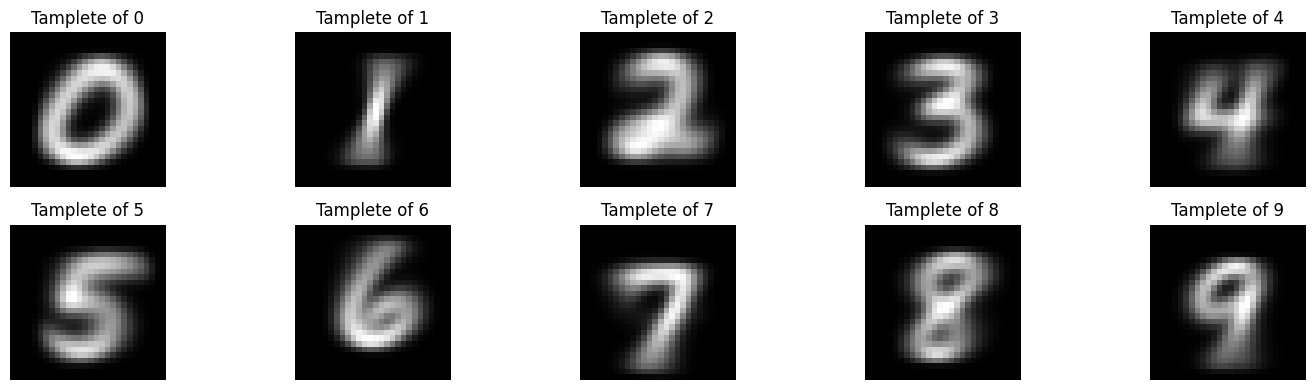

In [30]:
plt.figure(figsize=(15, 4))

for label in range(10):
    plt.subplot(2, 5, label + 1)
    plt.imshow(stamps[label], cmap='gray')
    plt.title(f"Tamplete of {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
def predict(img):
    diffs = stamps - img          # shape: (10, H, W)
    errors = np.mean(diffs**2, axis=(1,2))  # shape: (10,)
    return np.argmin(errors)

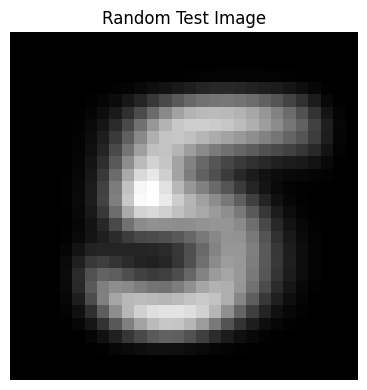

Random image label:  5
Prediction:  5


In [17]:
radom_test_index = random.randint(0, test_labels.size)

random_test_img = test_images[radom_test_index]

random_test_label = test_labels[radom_test_index]

plt.figure(figsize=(15, 4))

plt.imshow(stamps[random_test_label], cmap='gray')
plt.title(f"Random Test Image")
plt.axis('off')
plt.tight_layout()
plt.show()

print("Random image label: ", random_test_label)
print("Prediction: ", predict(random_test_img))

In [18]:
correct = 0

for img , label in tqdm( zip(test_images, test_labels), total=len(test_images)) :

    prediction = predict(img)

    if prediction == label:
        correct += 1

accuracy = correct / len(test_images)
    
accuracy

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 77500.36it/s]


0.8203

In [19]:
correct_per_class = {i: 0 for i in range(10)}
total_per_class = {i: 0 for i in range(10)}

# scorri tutte le immagini di test
for img, true_label in zip(test_images, test_labels):
    diffs = stamps - img
    errors = np.mean(diffs**2, axis=(1,2))
    predicted_label = np.argmin(errors)
    
    total_per_class[true_label] += 1
    if predicted_label == true_label:
        correct_per_class[true_label] += 1

# ora calcola accuracy per classe
accuracy_per_class = {}
for i in range(10):
    if total_per_class[i] > 0:
        accuracy_per_class[i] = correct_per_class[i] / total_per_class[i]
    else:
        accuracy_per_class[i] = 0.0

# stampa il risultato
for i in range(10):
    print(f"Classe {i}: {accuracy_per_class[i]:.4f} ({accuracy_per_class[i]*100:.2f}%)")


Classe 0: 0.8959 (89.59%)
Classe 1: 0.9621 (96.21%)
Classe 2: 0.7568 (75.68%)
Classe 3: 0.8059 (80.59%)
Classe 4: 0.8259 (82.59%)
Classe 5: 0.6861 (68.61%)
Classe 6: 0.8633 (86.33%)
Classe 7: 0.8327 (83.27%)
Classe 8: 0.7372 (73.72%)
Classe 9: 0.8067 (80.67%)


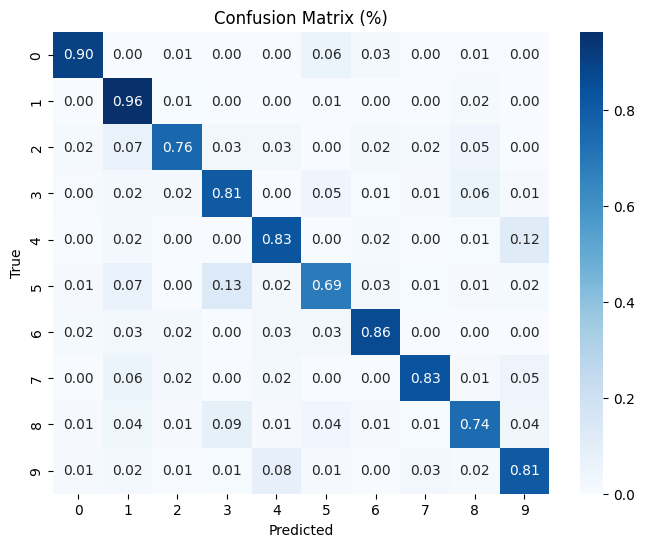

In [28]:
for img, true_label in zip(test_images, test_labels):
    diffs = stamps - img
    errors = np.mean(diffs**2, axis=(1,2))
    predicted_label = np.argmin(errors)
    cm[true_label, predicted_label] += 1

# Normalizza per riga (somma su ogni vera classe)
cm_percent = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(8,6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (%)")
plt.show()